In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [37]:
t = 500.0
tt = 250.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [38]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375;
const α = 1.15; const U0 = 0.3;
const xthr = 0.9; const ythr = 0.4
const ΔU0 = 0.4
I0 = -1.509460;

In [42]:
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [0.5287662926292962, 0.9611190233149197, 0.41838101329795496]

ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [0.528766, 0.961119, 0.418381]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.15, 0.013, 0.15, 1.8, 3.07, …, 0.3, 0.4, 0.4375, -1.50946]

In [43]:
I0range = range( -1.509460, -1.509490, length = 5000 )

idx_control_parameter = 11

idx_fix = 2; fixed_value = 0.915
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-11, atol = 1e-11);

In [44]:
length(I0range)

5000

In [45]:
idx_save = 1
output = produce_orbitdiagram(ds, surface, idx_save,
                        idx_control_parameter, I0range;
                        tfinal = t, Ttr = tt,
                        printparams = true,
                        diffeq = integ_set, rootkw = setting_root
                        );

parameter = -1.50946
parameter = -1.5094600060012002
parameter = -1.5094600120024004
parameter = -1.5094600180036006
parameter = -1.509460024004801
parameter = -1.5094600300060013
parameter = -1.5094600360072015
parameter = -1.5094600420084017
parameter = -1.5094600480096019
parameter = -1.509460054010802
parameter = -1.5094600600120025
parameter = -1.5094600660132027
parameter = -1.509460072014403
parameter = -1.5094600780156031
parameter = -1.5094600840168033
parameter = -1.5094600900180035
parameter = -1.509460096019204
parameter = -1.5094601020204041
parameter = -1.5094601080216044
parameter = -1.5094601140228046
parameter = -1.5094601200240048
parameter = -1.509460126025205
parameter = -1.5094601320264054
parameter = -1.5094601380276056
parameter = -1.5094601440288058
parameter = -1.509460150030006
parameter = -1.5094601560312062
parameter = -1.5094601620324064
parameter = -1.5094601680336068
parameter = -1.509460174034807
parameter = -1.5094601800360072
parameter = -1.50946018603

parameter = -1.5094615543108623
parameter = -1.5094615603120625
parameter = -1.5094615663132627
parameter = -1.5094615723144629
parameter = -1.509461578315663
parameter = -1.5094615843168633
parameter = -1.5094615903180637
parameter = -1.509461596319264
parameter = -1.5094616023204641
parameter = -1.5094616083216643
parameter = -1.5094616143228645
parameter = -1.5094616203240647
parameter = -1.5094616263252651
parameter = -1.5094616323264654
parameter = -1.5094616383276656
parameter = -1.5094616443288658
parameter = -1.509461650330066
parameter = -1.5094616563312662
parameter = -1.5094616623324666
parameter = -1.5094616683336668
parameter = -1.509461674334867
parameter = -1.5094616803360672
parameter = -1.5094616863372674
parameter = -1.5094616923384676
parameter = -1.509461698339668
parameter = -1.5094617043408682
parameter = -1.5094617103420684
parameter = -1.5094617163432686
parameter = -1.5094617223444688
parameter = -1.509461728345669
parameter = -1.5094617343468695
parameter = -1

parameter = -1.509463102620524
parameter = -1.5094631086217243
parameter = -1.5094631146229245
parameter = -1.509463120624125
parameter = -1.5094631266253251
parameter = -1.5094631326265253
parameter = -1.5094631386277255
parameter = -1.5094631446289257
parameter = -1.509463150630126
parameter = -1.5094631566313264
parameter = -1.5094631626325266
parameter = -1.5094631686337268
parameter = -1.509463174634927
parameter = -1.5094631806361272
parameter = -1.5094631866373274
parameter = -1.5094631926385278
parameter = -1.509463198639728
parameter = -1.5094632046409282
parameter = -1.5094632106421284
parameter = -1.5094632166433286
parameter = -1.5094632226445288
parameter = -1.5094632286457292
parameter = -1.5094632346469294
parameter = -1.5094632406481296
parameter = -1.5094632466493298
parameter = -1.50946325265053
parameter = -1.5094632586517303
parameter = -1.5094632646529307
parameter = -1.5094632706541309
parameter = -1.509463276655331
parameter = -1.5094632826565313
parameter = -1.5

parameter = -1.5094646509301861
parameter = -1.5094646569313863
parameter = -1.5094646629325865
parameter = -1.5094646689337867
parameter = -1.509464674934987
parameter = -1.5094646809361871
parameter = -1.5094646869373876
parameter = -1.5094646929385878
parameter = -1.509464698939788
parameter = -1.5094647049409882
parameter = -1.5094647109421884
parameter = -1.5094647169433886
parameter = -1.509464722944589
parameter = -1.5094647289457892
parameter = -1.5094647349469894
parameter = -1.5094647409481896
parameter = -1.5094647469493898
parameter = -1.50946475295059
parameter = -1.5094647589517904
parameter = -1.5094647649529906
parameter = -1.5094647709541908
parameter = -1.509464776955391
parameter = -1.5094647829565913
parameter = -1.5094647889577915
parameter = -1.5094647949589919
parameter = -1.509464800960192
parameter = -1.5094648069613923
parameter = -1.5094648129625925
parameter = -1.5094648189637927
parameter = -1.509464824964993
parameter = -1.5094648309661933
parameter = -1.5

parameter = -1.509466199239848
parameter = -1.5094662052410481
parameter = -1.5094662112422486
parameter = -1.5094662172434488
parameter = -1.509466223244649
parameter = -1.5094662292458492
parameter = -1.5094662352470494
parameter = -1.5094662412482496
parameter = -1.50946624724945
parameter = -1.5094662532506502
parameter = -1.5094662592518504
parameter = -1.5094662652530506
parameter = -1.5094662712542508
parameter = -1.509466277255451
parameter = -1.5094662832566512
parameter = -1.5094662892578516
parameter = -1.5094662952590518
parameter = -1.509466301260252
parameter = -1.5094663072614523
parameter = -1.5094663132626525
parameter = -1.5094663192638527
parameter = -1.509466325265053
parameter = -1.5094663312662533
parameter = -1.5094663372674535
parameter = -1.5094663432686537
parameter = -1.509466349269854
parameter = -1.509466355271054
parameter = -1.5094663612722545
parameter = -1.5094663672734547
parameter = -1.509466373274655
parameter = -1.5094663792758551
parameter = -1.509

parameter = -1.5094677535507102
parameter = -1.5094677595519104
parameter = -1.5094677655531106
parameter = -1.5094677715543108
parameter = -1.5094677775555112
parameter = -1.5094677835567114
parameter = -1.5094677895579116
parameter = -1.5094677955591118
parameter = -1.509467801560312
parameter = -1.5094678075615122
parameter = -1.5094678135627126
parameter = -1.5094678195639128
parameter = -1.509467825565113
parameter = -1.5094678315663133
parameter = -1.5094678375675135
parameter = -1.5094678435687137
parameter = -1.509467849569914
parameter = -1.5094678555711143
parameter = -1.5094678615723145
parameter = -1.5094678675735147
parameter = -1.509467873574715
parameter = -1.509467879575915
parameter = -1.5094678855771155
parameter = -1.5094678915783157
parameter = -1.509467897579516
parameter = -1.5094679035807161
parameter = -1.5094679095819163
parameter = -1.5094679155831165
parameter = -1.509467921584317
parameter = -1.5094679275855172
parameter = -1.5094679335867174
parameter = -1.

parameter = -1.5094693078615724
parameter = -1.5094693138627726
parameter = -1.5094693198639728
parameter = -1.509469325865173
parameter = -1.5094693318663732
parameter = -1.5094693378675734
parameter = -1.5094693438687738
parameter = -1.509469349869974
parameter = -1.5094693558711743
parameter = -1.5094693618723745
parameter = -1.5094693678735747
parameter = -1.5094693738747749
parameter = -1.5094693798759753
parameter = -1.5094693858771755
parameter = -1.5094693918783757
parameter = -1.509469397879576
parameter = -1.509469403880776
parameter = -1.5094694098819763
parameter = -1.5094694158831767
parameter = -1.509469421884377
parameter = -1.5094694278855771
parameter = -1.5094694338867773
parameter = -1.5094694398879775
parameter = -1.5094694458891778
parameter = -1.5094694518903782
parameter = -1.5094694578915784
parameter = -1.5094694638927786
parameter = -1.5094694698939788
parameter = -1.509469475895179
parameter = -1.5094694818963792
parameter = -1.5094694878975796
parameter = -1

parameter = -1.5094708621724344
parameter = -1.5094708681736346
parameter = -1.509470874174835
parameter = -1.5094708801760353
parameter = -1.5094708861772355
parameter = -1.5094708921784357
parameter = -1.5094708981796359
parameter = -1.509470904180836
parameter = -1.5094709101820365
parameter = -1.5094709161832367
parameter = -1.509470922184437
parameter = -1.509470928185637
parameter = -1.5094709341868373
parameter = -1.5094709401880375
parameter = -1.509470946189238
parameter = -1.5094709521904381
parameter = -1.5094709581916383
parameter = -1.5094709641928385
parameter = -1.5094709701940388
parameter = -1.509470976195239
parameter = -1.5094709821964394
parameter = -1.5094709881976396
parameter = -1.5094709941988398
parameter = -1.50947100020004
parameter = -1.5094710062012402
parameter = -1.5094710122024404
parameter = -1.5094710182036408
parameter = -1.509471024204841
parameter = -1.5094710302060412
parameter = -1.5094710362072414
parameter = -1.5094710422084416
parameter = -1.50

parameter = -1.5094724104820965
parameter = -1.5094724164832967
parameter = -1.5094724224844969
parameter = -1.509472428485697
parameter = -1.5094724344868973
parameter = -1.5094724404880977
parameter = -1.509472446489298
parameter = -1.509472452490498
parameter = -1.5094724584916983
parameter = -1.5094724644928985
parameter = -1.5094724704940987
parameter = -1.5094724764952991
parameter = -1.5094724824964993
parameter = -1.5094724884976995
parameter = -1.5094724944988998
parameter = -1.5094725005001
parameter = -1.5094725065013002
parameter = -1.5094725125025006
parameter = -1.5094725185037008
parameter = -1.509472524504901
parameter = -1.5094725305061012
parameter = -1.5094725365073014
parameter = -1.5094725425085016
parameter = -1.509472548509702
parameter = -1.5094725545109022
parameter = -1.5094725605121024
parameter = -1.5094725665133026
parameter = -1.5094725725145028
parameter = -1.509472578515703
parameter = -1.5094725845169035
parameter = -1.5094725905181037
parameter = -1.50

parameter = -1.5094739587917583
parameter = -1.5094739647929587
parameter = -1.509473970794159
parameter = -1.509473976795359
parameter = -1.5094739827965593
parameter = -1.5094739887977595
parameter = -1.5094739947989597
parameter = -1.5094740008001601
parameter = -1.5094740068013603
parameter = -1.5094740128025605
parameter = -1.5094740188037608
parameter = -1.509474024804961
parameter = -1.5094740308061612
parameter = -1.5094740368073614
parameter = -1.5094740428085618
parameter = -1.509474048809762
parameter = -1.5094740548109622
parameter = -1.5094740608121624
parameter = -1.5094740668133626
parameter = -1.5094740728145628
parameter = -1.5094740788157632
parameter = -1.5094740848169634
parameter = -1.5094740908181636
parameter = -1.5094740968193638
parameter = -1.509474102820564
parameter = -1.5094741088217642
parameter = -1.5094741148229647
parameter = -1.5094741208241649
parameter = -1.509474126825365
parameter = -1.5094741328265653
parameter = -1.5094741388277655
parameter = -1

parameter = -1.5094755131026205
parameter = -1.5094755191038207
parameter = -1.509475525105021
parameter = -1.5094755311062213
parameter = -1.5094755371074215
parameter = -1.5094755431086218
parameter = -1.509475549109822
parameter = -1.5094755551110222
parameter = -1.5094755611122224
parameter = -1.5094755671134228
parameter = -1.509475573114623
parameter = -1.5094755791158232
parameter = -1.5094755851170234
parameter = -1.5094755911182236
parameter = -1.5094755971194238
parameter = -1.5094756031206242
parameter = -1.5094756091218244
parameter = -1.5094756151230246
parameter = -1.5094756211242248
parameter = -1.509475627125425
parameter = -1.5094756331266252
parameter = -1.5094756391278257
parameter = -1.5094756451290259
parameter = -1.509475651130226
parameter = -1.5094756571314263
parameter = -1.5094756631326265
parameter = -1.5094756691338267
parameter = -1.509475675135027
parameter = -1.5094756811362273
parameter = -1.5094756871374275
parameter = -1.5094756931386277
parameter = -1

parameter = -1.5094770614122826
parameter = -1.5094770674134828
parameter = -1.509477073414683
parameter = -1.5094770794158832
parameter = -1.5094770854170834
parameter = -1.5094770914182836
parameter = -1.509477097419484
parameter = -1.5094771034206842
parameter = -1.5094771094218844
parameter = -1.5094771154230846
parameter = -1.5094771214242848
parameter = -1.509477127425485
parameter = -1.5094771334266854
parameter = -1.5094771394278856
parameter = -1.5094771454290858
parameter = -1.509477151430286
parameter = -1.5094771574314862
parameter = -1.5094771634326865
parameter = -1.5094771694338869
parameter = -1.509477175435087
parameter = -1.5094771814362873
parameter = -1.5094771874374875
parameter = -1.5094771934386877
parameter = -1.509477199439888
parameter = -1.5094772054410883
parameter = -1.5094772114422885
parameter = -1.5094772174434887
parameter = -1.509477223444689
parameter = -1.5094772294458891
parameter = -1.5094772354470893
parameter = -1.5094772414482898
parameter = -1.

parameter = -1.5094786157231446
parameter = -1.5094786217243448
parameter = -1.5094786277255452
parameter = -1.5094786337267454
parameter = -1.5094786397279456
parameter = -1.5094786457291458
parameter = -1.509478651730346
parameter = -1.5094786577315462
parameter = -1.5094786637327466
parameter = -1.5094786697339468
parameter = -1.509478675735147
parameter = -1.5094786817363472
parameter = -1.5094786877375475
parameter = -1.5094786937387477
parameter = -1.509478699739948
parameter = -1.5094787057411483
parameter = -1.5094787117423485
parameter = -1.5094787177435487
parameter = -1.509478723744749
parameter = -1.509478729745949
parameter = -1.5094787357471495
parameter = -1.5094787417483497
parameter = -1.50947874774955
parameter = -1.5094787537507501
parameter = -1.5094787597519503
parameter = -1.5094787657531505
parameter = -1.509478771754351
parameter = -1.5094787777555512
parameter = -1.5094787837567514
parameter = -1.5094787897579516
parameter = -1.5094787957591518
parameter = -1.5

parameter = -1.5094801640328066
parameter = -1.5094801700340068
parameter = -1.509480176035207
parameter = -1.5094801820364072
parameter = -1.5094801880376074
parameter = -1.5094801940388078
parameter = -1.509480200040008
parameter = -1.5094802060412083
parameter = -1.5094802120424085
parameter = -1.5094802180436087
parameter = -1.5094802240448089
parameter = -1.5094802300460093
parameter = -1.5094802360472095
parameter = -1.5094802420484097
parameter = -1.50948024804961
parameter = -1.50948025405081
parameter = -1.5094802600520103
parameter = -1.5094802660532107
parameter = -1.509480272054411
parameter = -1.5094802780556111
parameter = -1.5094802840568113
parameter = -1.5094802900580115
parameter = -1.5094802960592117
parameter = -1.5094803020604122
parameter = -1.5094803080616124
parameter = -1.5094803140628126
parameter = -1.5094803200640128
parameter = -1.509480326065213
parameter = -1.5094803320664132
parameter = -1.5094803380676136
parameter = -1.5094803440688138
parameter = -1.5

parameter = -1.5094817183436688
parameter = -1.509481724344869
parameter = -1.5094817303460693
parameter = -1.5094817363472695
parameter = -1.5094817423484697
parameter = -1.5094817483496699
parameter = -1.50948175435087
parameter = -1.5094817603520705
parameter = -1.5094817663532707
parameter = -1.509481772354471
parameter = -1.509481778355671
parameter = -1.5094817843568713
parameter = -1.5094817903580715
parameter = -1.509481796359272
parameter = -1.5094818023604721
parameter = -1.5094818083616723
parameter = -1.5094818143628725
parameter = -1.5094818203640727
parameter = -1.509481826365273
parameter = -1.5094818323664734
parameter = -1.5094818383676736
parameter = -1.5094818443688738
parameter = -1.509481850370074
parameter = -1.5094818563712742
parameter = -1.5094818623724744
parameter = -1.5094818683736748
parameter = -1.509481874374875
parameter = -1.5094818803760752
parameter = -1.5094818863772754
parameter = -1.5094818923784756
parameter = -1.5094818983796758
parameter = -1.50

parameter = -1.5094832726545309
parameter = -1.509483278655731
parameter = -1.5094832846569315
parameter = -1.5094832906581317
parameter = -1.509483296659332
parameter = -1.509483302660532
parameter = -1.5094833086617323
parameter = -1.5094833146629325
parameter = -1.509483320664133
parameter = -1.5094833266653331
parameter = -1.5094833326665333
parameter = -1.5094833386677335
parameter = -1.5094833446689337
parameter = -1.509483350670134
parameter = -1.5094833566713344
parameter = -1.5094833626725346
parameter = -1.5094833686737348
parameter = -1.509483374674935
parameter = -1.5094833806761352
parameter = -1.5094833866773354
parameter = -1.5094833926785358
parameter = -1.509483398679736
parameter = -1.5094834046809362
parameter = -1.5094834106821364
parameter = -1.5094834166833366
parameter = -1.5094834226845368
parameter = -1.509483428685737
parameter = -1.5094834346869375
parameter = -1.5094834406881377
parameter = -1.5094834466893379
parameter = -1.509483452690538
parameter = -1.50

parameter = -1.509484826965393
parameter = -1.5094848329665933
parameter = -1.5094848389677935
parameter = -1.5094848449689937
parameter = -1.5094848509701941
parameter = -1.5094848569713943
parameter = -1.5094848629725945
parameter = -1.5094848689737947
parameter = -1.509484874974995
parameter = -1.5094848809761952
parameter = -1.5094848869773956
parameter = -1.5094848929785958
parameter = -1.509484898979796
parameter = -1.5094849049809962
parameter = -1.5094849109821964
parameter = -1.5094849169833966
parameter = -1.509484922984597
parameter = -1.5094849289857972
parameter = -1.5094849349869974
parameter = -1.5094849409881976
parameter = -1.5094849469893978
parameter = -1.509484952990598
parameter = -1.5094849589917985
parameter = -1.5094849649929987
parameter = -1.5094849709941989
parameter = -1.509484976995399
parameter = -1.5094849829965993
parameter = -1.5094849889977995
parameter = -1.509484994999
parameter = -1.5094850010002
parameter = -1.5094850070014003
parameter = -1.509485

parameter = -1.5094863812762553
parameter = -1.5094863872774555
parameter = -1.5094863932786557
parameter = -1.509486399279856
parameter = -1.5094864052810562
parameter = -1.5094864112822564
parameter = -1.5094864172834568
parameter = -1.509486423284657
parameter = -1.5094864292858572
parameter = -1.5094864352870574
parameter = -1.5094864412882576
parameter = -1.5094864472894578
parameter = -1.5094864532906582
parameter = -1.5094864592918584
parameter = -1.5094864652930586
parameter = -1.5094864712942588
parameter = -1.509486477295459
parameter = -1.5094864832966592
parameter = -1.5094864892978597
parameter = -1.5094864952990599
parameter = -1.50948650130026
parameter = -1.5094865073014603
parameter = -1.5094865133026605
parameter = -1.5094865193038607
parameter = -1.509486525305061
parameter = -1.5094865313062613
parameter = -1.5094865373074615
parameter = -1.5094865433086617
parameter = -1.509486549309862
parameter = -1.5094865553110621
parameter = -1.5094865613122626
parameter = -1.

parameter = -1.5094879295859172
parameter = -1.5094879355871174
parameter = -1.5094879415883176
parameter = -1.509487947589518
parameter = -1.5094879535907182
parameter = -1.5094879595919184
parameter = -1.5094879655931186
parameter = -1.5094879715943188
parameter = -1.509487977595519
parameter = -1.5094879835967194
parameter = -1.5094879895979196
parameter = -1.5094879955991198
parameter = -1.50948800160032
parameter = -1.5094880076015202
parameter = -1.5094880136027204
parameter = -1.5094880196039209
parameter = -1.509488025605121
parameter = -1.5094880316063213
parameter = -1.5094880376075215
parameter = -1.5094880436087217
parameter = -1.509488049609922
parameter = -1.5094880556111223
parameter = -1.5094880616123225
parameter = -1.5094880676135227
parameter = -1.509488073614723
parameter = -1.5094880796159231
parameter = -1.5094880856171233
parameter = -1.5094880916183238
parameter = -1.509488097619524
parameter = -1.5094881036207242
parameter = -1.5094881096219244
parameter = -1.5

parameter = -1.5094894778955792
parameter = -1.5094894838967794
parameter = -1.5094894898979796
parameter = -1.5094894958991798
parameter = -1.50948950190038
parameter = -1.5094895079015802
parameter = -1.5094895139027806
parameter = -1.5094895199039808
parameter = -1.509489525905181
parameter = -1.5094895319063812
parameter = -1.5094895379075814
parameter = -1.5094895439087817
parameter = -1.509489549909982
parameter = -1.5094895559111823
parameter = -1.5094895619123825
parameter = -1.5094895679135827
parameter = -1.509489573914783
parameter = -1.509489579915983
parameter = -1.5094895859171835
parameter = -1.5094895919183837
parameter = -1.509489597919584
parameter = -1.5094896039207841
parameter = -1.5094896099219843
parameter = -1.5094896159231845
parameter = -1.509489621924385
parameter = -1.5094896279255852
parameter = -1.5094896339267854
parameter = -1.5094896399279856
parameter = -1.5094896459291858
parameter = -1.509489651930386
parameter = -1.5094896579315864
parameter = -1.50

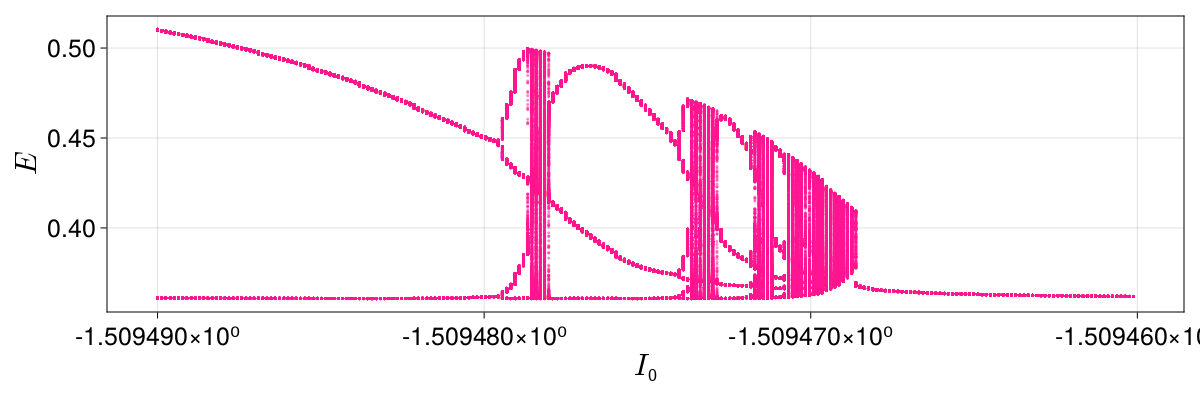

In [52]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("deeppink", 0.5), markersize = 3.0)
end
f

In [53]:
save("E_right_space_5000_dots.jld", "data", output)

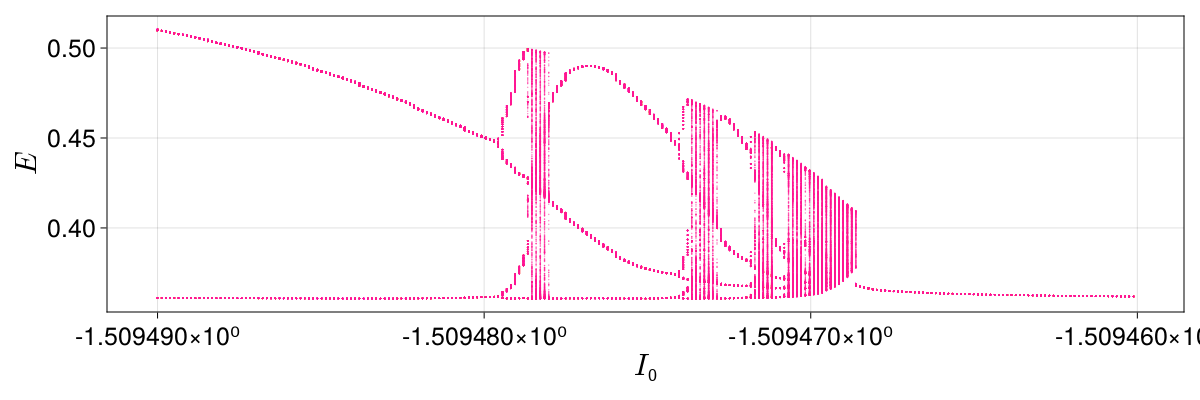

In [36]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("deeppink", 0.5), markersize = 1.5)
end
f